# 스택 2

## 목차

### 1. 계산기 1
### 2. 계산기 2
### 3. 백트래킹
### 4. 부분집합
### 5. 순열
### 6. 분할정복

## 1. 계산기1

### 계산기
문자열로 된 계산식이 주어질 때, 스택을 이용하여 이 계산식의 값 계산 가능

#### 문자열 수식 계산의 일반적인 방법
1. step1 : 중위 표기법의 수식을 후위표기법으로 변경(스택 이용)
2. step2 : 후위 표기법의 수식을 스택을 이용하여 계산

#### 중위표기법(infix notation)
연산자를 피연산자의 가운데 표기하는 방법
- A + B
#### 후위표기법(postfix notation)
연산자를 피연산자 뒤에 표기하는 방법
- AB+


#### step1 : 중위표기법에서 후위표기법으로의 변환
- 수식의 각 연산자에 대해서 우선순위에 따라 괄호를 사용하여 다시 표현한다
- 각 연산자를 그에 대응하는 오른쪽 괄호의 뒤로 이동시킨다
- 괄호를 제거한다

ex. A * B - C / D
- 1단계 : ((A*B) - (C/D))
- 2단계 : ((A B)* (C D)/)-
- 3단계 : AB*CD/-

ex. (6 + 5 * (2 - 8) / 2) -> 6528-*/+

#### 후위표기법으로의 변환 알고리즘(스택 이용)
1. 입력받은 중위 표기식에서 토큰을 읽는다
2. 토큰이 피연산자일 경우, 토큰을 출력한다
3. 토큰이 연산자(괄호 포함)일 경우, 이 토큰과 스택의 top에 저장된 연산자의 우선순위를 비교한다
    - 토큰의 우선순위가 높을 경우 스택에 push하고, 아닐 경우, 스택의 top 연산자의 우선순위가 토큰보다 작아질 때 까지 스택에서 pop한 후, 토큰의 연산자를 push한다
    - 만약 top에 연산자가 없을 경우(빈 스택일 경우) push 한다
4. 토큰이 닫힌 괄호')'일 경우, 스택의 top에 왼쪽 괄고 '('가 올 때 까지 스택에 pop연산을 수행하고, pop한 연산자를 출력한다
    - 열린 괄호'('일 경우, pop만 한다
5. 중위 표기식 내에서 더 읽을 것이 없을 경우 중지하고, 더 있을 경우 1번부터 다시 반복한다
6. 스택에 남아있는 연산자를 모두 pop하여 출력한다

#### isp, icp 우선순위
1. icp(in-coming priority)
2. isp(in-stack priority)
- icp보다 isp가 큰 경우(토큰의 우선순위가 top위치의 우선순위보다 높을 경우) : push
- icp가 isp와 같거나 큰경우(토큰의 우선순위가 top위치의 우선순위보다 높지 않을 경우 : pop
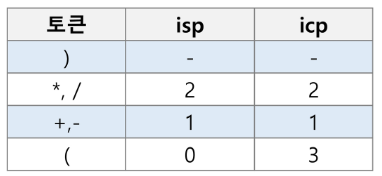

```python
# ex. 중위 표기법 : (6+5*(2-8)/2) -> 후위 표기법 : 
arr = list('(6+5*(2-8)/2)')
stack = []
back = []

isp = {'*' : 2,
       '/' : 2,
       '+' : 1,
       '-' : 1,
       '(' : 0
      }

icp = {'*' : 2,
       '/' : 2,
       '+' : 1,
       '-' : 1,
       '(' : 3
      }


for s in arr:
    if s not in "+-*/()":
        back.append(s)
    else:
        if s == ')':
            while stack[-1] != '(':
                back.append(stack.pop())
            stack.pop()
        else:
            if stack == []:
                stack.append(s)
            # 스택의 top 연산자의 우선순위보다 토큰의 우선순위가 더 높을 경우
            elif icp[s] > isp[stack[-1]]:
                stack.append(s)
            else:
                while stack[-1] != '(':
                    back.append(stack.pop())
                stack.pop()
```            
        
    

In [26]:
arr = list('(6+5*(2-8)/2)')
stack = []
back = []

isp = {'*' : 2,
       '/' : 2,
       '+' : 1,
       '-' : 1,
       '(' : 0
      }

icp = {'*' : 2,
       '/' : 2,
       '+' : 1,
       '-' : 1,
       '(' : 3
      }


for s in arr:
    if s not in "+-*/()":
        back.append(s)
        
    else:
        if s == '(':
            stack.append(s)
            
            
        elif s == ')':
            while stack[-1] != '(':
                back.append(stack.pop())
            stack.pop()
            
        else:
            if stack == []:
                stack.append(s)
               
            # 스택의 top 연산자의 우선순위보다 토큰의 우선순위가 더 높을 경우
            else:
                if icp[s] > isp[stack[-1]]:
                    stack.append(s)
                    
                else:
                    while icp[s] > isp[stack[-1]]:
                        back.append(stack.pop())
                    stack.append(s)
                   
            
    
print(back)

['6', '5', '2', '8', '-', '2', '/', '*', '+']


## 2. 계산기 2

### 계산기 2
#### 후위 표기법의 수식을 스택을 이용하여 계산
1. 피연산자를 만나면 스택에 push한다
2. 연산자를 만나면 필ㅇ

   

In [ ]:
stack = [0] * 100
top = -1
string = '6528-*2/+'

for x in string:
    if x not in '+-/*':
        top += 1
        stack[top] = int(x)
    else:
        if x == '+':
            op2 = stack[top]
            top -= 1
            op1 = stack[top]
            top -= 1
            top += 1
            stack[top] = op1 + op2
        elif x == '-':
            op2 = stack[top]
            top -= 1
            op1 = stack[top]
            top -= 1
            top += 1
            stack[top] = op1 - op2
        elif x == '/':
            op2 = stack[top]
            top -= 1
            op1 = stack[top]
            top -= 1
            top += 1
            stack[top] = op1 / op2
            
        elif x == '*':
            op2 = stack[top]
            top -= 1
            op1 = stack[top]
            top -= 1
            top += 1
            stack[top] = op1 * op2




In [ ]:
stack = [0] * 100
top = -1
icp = {'(' : 3, 
       '*' : 2,
       '/' : 2,
       '+' : 1,
       '-' : 1}
isp = {'(' : 0,
       '*' : 2,
       '/' : 2,
       '+' : 1,
       '-' : 1}
fx = '(6+55*(2-8)/2)'
result = ''
for x in fx:
    if x not in '(+-*/)':
        result += x
    elif x == ')':
        while
        # 토큰의 우선순위가 더 높을 경우
    else:    
        if top == -1 or isp[stack[top]] < icp[stack[top]]:
            top += 1
            stack[top] = x
            
        

## 3. 백트래킹

### 백트래킹
해를 찾는 도중 막히면(해가 아니면) 되돌아가서 다시 해를 찾아가는 기법
- 최적화 문제와 결정 문제 해결
- 결정 문제 : 문제의 조건을 만족하는 해가 존재하는지의 여부를 yes 혹은 no로 답하는 문제
- (ex. 미로 찾기, n-Queen, Map coloring, 부분 집합의 합 등)

#### 깊이우선탐색과의 차이
- 어떤 노드에서 출발하는 경로가 해결책으로 이어질 것 같지 않으면 더 이상 그 경로를 따라가지 않음으로써 시도의 횟수를 줄임(Prunning : 가지치기)
- 깊이우선탐색이 모든 경로를 추적하는데 비해 백트래킹은 불필요한 경로를 조기에 차단
- 깊이우선탐색을 가하기에는 경우의 수가 너무나 많음 즉, N! 가지의 경우의 수를 가진 문제에 대해 깊이우선탐색을 가하면 당연히 처리 불가능한 문제
- 백트래킹 알고리즘을 적용하면 일반적으로 경우의 수가 줄어들지만 이 역시 최악의 경우에는 여전히 지수함수 시간(Exponential Time)을 요하므로 처리 불가능
- 모든 후보를 검사? NO!

#### 백트래킹 기법
어떤 노드의 유망성을 점검한 후에 유망(promising)하지 않다고 결정되면 그 노드의 부모로 되돌아가(backtracking) 다음 자식 노드로 감
- 어떤 노드를 방문하였을 때 그 노드를 포함한 경로가 해답이 될 수 없으면 그 노드는 유망하지 않다고 함
- 반대로 해답의 가능성이 있으면 유망하다고 함
- 가지치기 : 유망하지 않은 노드가 포함된 경로는 더 이상 고려하지 않는 것

#### 백트래킹 알고리즘
1. 상태 공간 트리의 깊이 우선 검색 실시
2. 각 노드가 유망한지 점검
3. 만일 그 노드가 유망하지 않으면, 그 노드의 부모 노드로 돌아가서 검색을 계속

In [ ]:
# 백트래킹 알고리즘
def chechnode(v):
    if promising(v):
        if there is a solution at v:
            write the solution
        else:
            for u in each child of v:
                checknode(u)

#### 백트래킹으로 부분집합 구하기
어떤 집합의 공집합과 자기자신을 포함한 모든 부분집합을 powerset이라고 하며, 구하고자 하는 어떤 집합의 원소 개수가 n일 경우 부분집합의 개수는 2^n개 이다.
- 일반적인 백트래킹 접근 방법 이용
- n개의 원소가 들어있는 집합의 2^n개의 부분집합이 만들 때, True 또는 False의 값을 가지는 항목들로 구성된 n개의 배열을 만드는 방법 이용
- 이 때, 배열의 i번째 항목 : i번째 원소가 부분집합 내의 원소인지 나타내는 값

In [ ]:
# 부분집합 생성 
bit = [0, 0, 0, 0]
for i in range(2):
    bit[0] = i
    for j in range(2):
        bit[1] = j
        for 

## 4. 부분집합

### 부분 집합의 합
집합의 원소에 대해 각 부분집합에서의 포함 여부 : 트리로 표현 가능
- i원소의 포함 여부를 결정하면 i까지의 부분 집합의 합 s(i) 결정 가능
- s(i-1)이 찾고자 하는 부분집합의 합보다 크면, 남은 원소를 고려할 필요 X
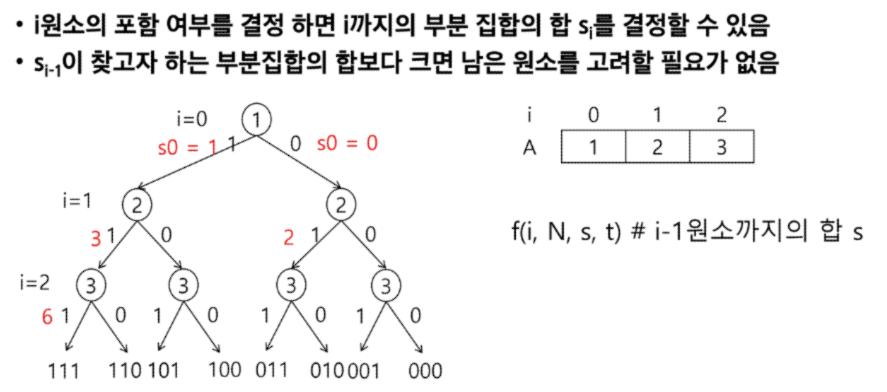
```python
# 재귀함수의 기본형
# 두 개의 매개변수를 가지는 함수가 기본
def f(i, N): # i : 현재 step / N : 목표
    if i == N:
        return
    else:
        f(i+1, N)
        return
```
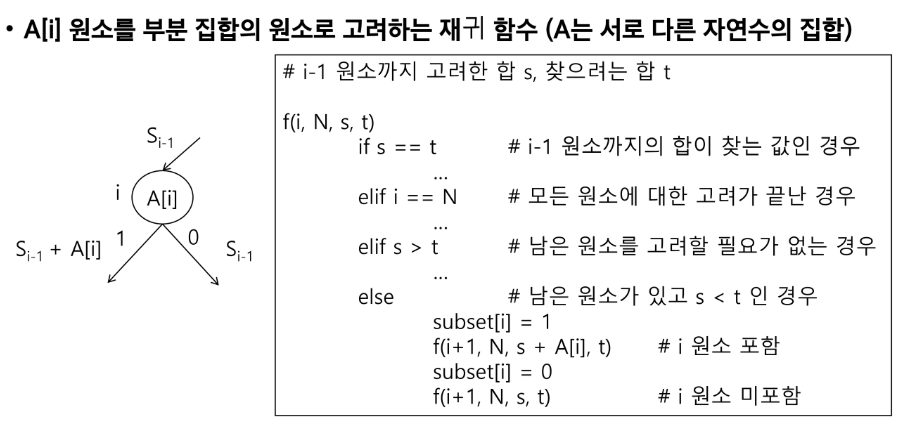
```python
# 재귀함수를 이용한 부분집합의 합
def f(i, N):
    if i == N:
        return
    else:
        bit[i] = 1
        f(i+1, N)
        bit[i] = 0
        f(i+1, N)
```

s : i-1의 원소까지의 합
```python
# i : 현재 step
# N : 원소 개수
# s : i-1까지 부분집합 원소들의 합
def f(i, N, s):
    if i == N:
        s = 0
        for j in range(N):
            s += A[j]
        print(f'{i}번 step까지 고려하여 포함된 원소들의 합 : {s}')
    else:
        bit[i] = 1 # i가 부분집합에 포함된 경우
        f(i+1, N, s+A[i]) # 포함확정 -> i까지 원소의 합인 s에 새롭게 포함된 원소 A[i] 추가
        bit[i] = 0 # i가 부분집합에 포함되지 않은 경우
        f(i+1, N, s) # 불포함 확정 -> i+1까지의 부분집합의 원소 합 = i까지의 부분집합의 원소 합
```

#### 추가 고려 사항 : 가지치기
- 부분집합 생성 과정에서 이미 원소의 합이 target보다 클 경우 중단
- 남은 구간의 합을 현재 원소의 합과 더해도 target보다 작을 경우 중단
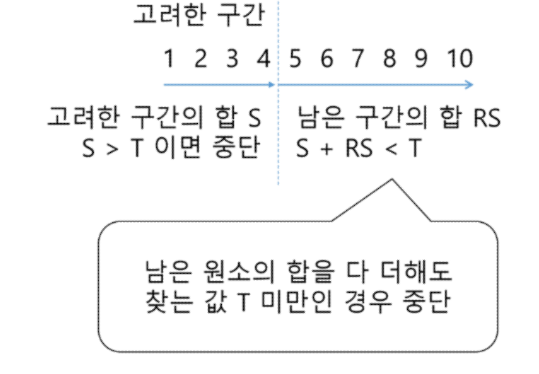

In [1]:
N = 3
A = [1, 2, 3]
B = [0] * N
def f(i, N):
    if i == N:
        print(B)
        return
    else:
        B[i] = A[i]
        f(i+1, N)
        return

f(0, N)


[1, 2, 3]


In [9]:
# 재귀함수를 이용한 배열의 각 원소에 접근
# 매개변수 : i, N
def f(i, N):
    if i == N:
        s = 0
        print(f'부분집합 : {bit}') 
        for j in range(N):
            if bit[j]:
                s += A[j]                
                # print(A[j], end = ' ')
        print(f'부분집합의 합 : {s}')
        print()
        return
    else:
        bit[i] = 1
        f(i+1, N)
        bit[i] = 0
        f(i+1, N)
        return 
        
A  = [1, 2, 3]
bit = [0] * 3

f(0, 3)

부분집합 : [1, 1, 1]
부분집합의 합 : 6

부분집합 : [1, 1, 0]
부분집합의 합 : 3

부분집합 : [1, 0, 1]
부분집합의 합 : 4

부분집합 : [1, 0, 0]
부분집합의 합 : 1

부분집합 : [0, 1, 1]
부분집합의 합 : 5

부분집합 : [0, 1, 0]
부분집합의 합 : 2

부분집합 : [0, 0, 1]
부분집합의 합 : 3

부분집합 : [0, 0, 0]
부분집합의 합 : 0



In [11]:
# 매개변수 : i, N, s
def f(i, N, s):
    if i == N:
        print(f'비트 결과 : {bit}')
        print(f'부분집합의 원소 합 : {s}')
        return
    else:
        bit[i] = 1 # i가 부분집합에 포함된 경우
        f(i+1, N, s+A[i]) # 포함확정 -> i까지 원소의 합인 s에 새롭게 포함된 원소 A[i] 추가
        bit[i] = 0 # i가 부분집합에 포함되지 않은 경우
        f(i+1, N, s) # 불포함 확정 -> i+1까지의 부분집합의 원소 합 = i까지의 부분집합의 원소 합

A  = [1, 2, 3]
bit = [0] * 3

f(0, 3, 0)

비트 결과 : [1, 1, 1]
부분집합의 원소 합 : 6
비트 결과 : [1, 1, 0]
부분집합의 원소 합 : 3
비트 결과 : [1, 0, 1]
부분집합의 원소 합 : 4
비트 결과 : [1, 0, 0]
부분집합의 원소 합 : 1
비트 결과 : [0, 1, 1]
부분집합의 원소 합 : 5
비트 결과 : [0, 1, 0]
부분집합의 원소 합 : 2
비트 결과 : [0, 0, 1]
부분집합의 원소 합 : 3
비트 결과 : [0, 0, 0]
부분집합의 원소 합 : 0


In [14]:
# 매개변수 : i, N, s, t
cnt = 0
def f(i, N, s, t): # t : 찾으려는 부분집합 원소의 합
    global cnt
    cnt += 1
    if s == t: # 현재까지 부분집합에 포함시킨 원소의 합이 찾으려는 값과 같아지는 경우(뒤의 원소를 볼 필요 x)
        print(bit)
    elif s > t: # 이미 넘어가 버린 경우
        return
    # t와 같아지진 않았지만, 남은 부분집합의 원소로 고려할 원소가 없는 경우
    elif i == N:
        return
    else:
        bit[i] = 1
        f(i+1, N, s + A[i], t)
        bit[i] = 0
        f(i+1, N, s, t)

N = 10
A = [i for i in range(1, N+1)]
bit = [0] * N
t = 10

f(0, N, 0, t)
print(cnt)



[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
2047


## 5. 순열

In [15]:
N = 3
A = [i for i in range(1, N+1)]

# visited를 사용하지 않고 순열 생성
def f(i, N):
    if i == N:
        print(A)
    else:
        # 자리 바꾸기
        # 자기 자신 기준 오른쪽들이랑만 자리 바꾸기(중복 피하기)
        for j in range(i, N): # 자신 ~ 오른쪽 끝
            A[i], A[j] = A[j], A[i]
            f(i+1, N)
            A[i], A[j] = A[j], A[i] # 재귀함수 뒤 원상복구(중복 피하기)
'''
# 이따 풀 배열 최소 합 문제
if i == N:
    total = 0
    for k in range(N):
        total += arr[k][A[k]]
'''
f(0, N)

[1, 2, 3]
[1, 3, 2]
[2, 1, 3]
[2, 3, 1]
[3, 2, 1]
[3, 1, 2]


## 6. 분할정복

### 분할 정복 알고리즘
분할(Divide)하고 각 분할 무문을 정복(Conquer)하여 통합(Combine)하는 방식

<분할정복 설계 전략>
- 분할(Divide) : 해결할 문제를 여러 개의 작은 부분으로 나눈다
- 정복(Conquer) : 나눈 작은 문제를 각각 해결한다
- 통합(Combine) : 필요할 경우, 해결된 해답을 모은다

In [27]:
# 분할 정복 거듭제곱
# 결과값 : (Base) ^ (Exponent)
def Power(Base, Exponent):
    if Exponent == 0 or Base == 0:
        return 1
    if Exponent % 2 == 0: # 짝수 제곱일 때
        NewBase = Power(Base, Exponent / 2)
        return NewBase * NewBase
    else: # 홀수 제곱일 때
        NewBase = Poser(Base, (Exponent-1) / 2)
        return (NewBase * NewBase) * Base